 ### DataScience2 lab -  Homework 2 
 Niv Aharon Cohen 312272461
 
 Eilon Reiner  205954118

In [25]:

import pandas as pd  
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# My libraries
import  linear_regression_hw2 as lr
import rnn_lstm_hw2 as rn
from lab2_hw2_utils import *
import data_change_utils as data
from constants_hw2 import *

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.models import load_model


In [26]:
#Convert the dataset txt file to csv for convenience

text_file_path = 'household_power_consumption.txt'
csv_file_path = 'household_power_consumption.csv'
#convert_txt_dataset_file_to_csv(text_file_path, csv_file_path)

In [27]:

# Read the text file directly into a DataFrame with ';' as the delimiter
#household_power_consumption_df = pd.read_csv('household_power_consumption.txt', delimiter=';')
household_power_consumption_df = pd.read_csv('household_power_consumption.csv')

C:\Users\97254\AppData\Local\Temp\ipykernel_30408\3382188800.py:3: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  household_power_consumption_df = pd.read_csv('household_power_consumption.csv')


In [28]:
household_power_consumption_df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


## 2. Exploratory Data Analysis (EDA)

While there are various features in the dataset, the one that helps the most to understand the actual power consumption is the "Global_active_power" feature. Because it includes most of the features that are represented in the dataset, and according to this feature, the Electric Corporation creates the bills to each household.


In [29]:
print("Basic information about the dataset:")
print(household_power_consumption_df.info())
print("\n")



Basic information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB
None




In [30]:
# Convert columns to numerical types if necessary
cols_to_convert = ['Global_active_power', 'Global_reactive_power', 'Voltage', 
                   'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

for col in cols_to_convert:
    household_power_consumption_df[col] = pd.to_numeric(household_power_consumption_df[col], errors='coerce')

# After conversion, describe again
household_power_consumption_df.describe()


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


In [31]:
print("\nMissing values in each column:")
print(household_power_consumption_df.isnull().sum())
print("\n")

# Optional: Check for unique values in each column
print("\nUnique values in each column:")
print(household_power_consumption_df.nunique())
print("\n")



Missing values in each column:
Date                         0
Time                         0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64



Unique values in each column:
Date                     1442
Time                     1440
Global_active_power      4186
Global_reactive_power     532
Voltage                  2837
Global_intensity          221
Sub_metering_1             88
Sub_metering_2             81
Sub_metering_3             32
dtype: int64




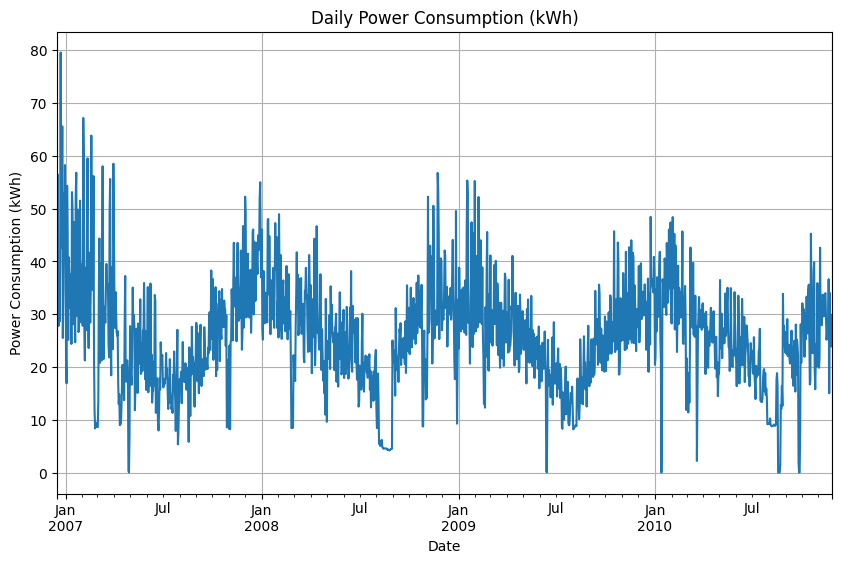

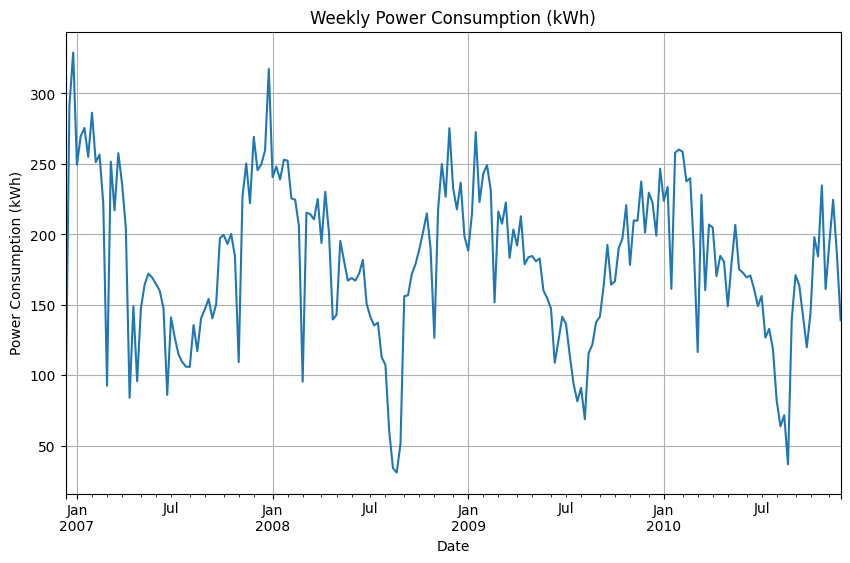

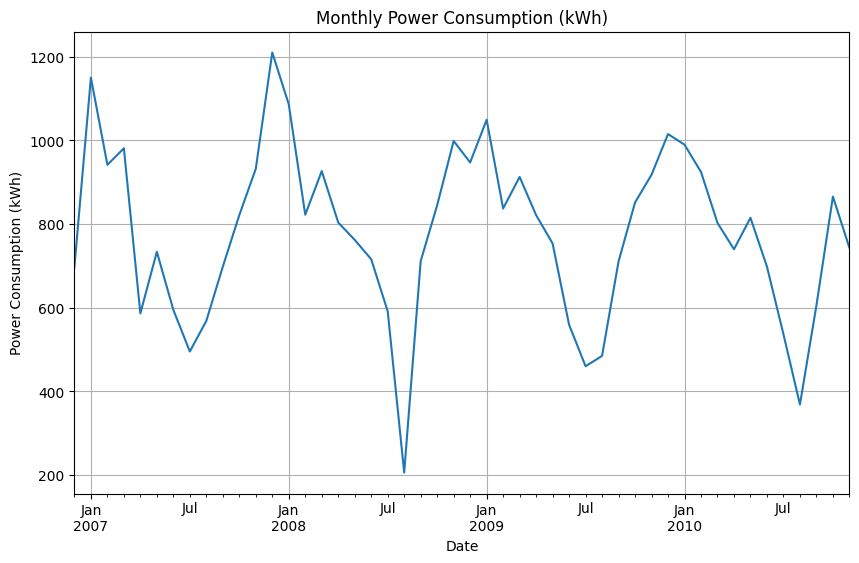

In [32]:

daily_consumption, weekly_consumption, monthly_consumption = calc_active_energy_consumed_per_hour_in_watt_hour(household_power_consumption_df)

plot_power_consumption_period(daily_consumption, 'daily')
plot_power_consumption_period(weekly_consumption, 'weekly')
plot_power_consumption_period(monthly_consumption, 'monthly')

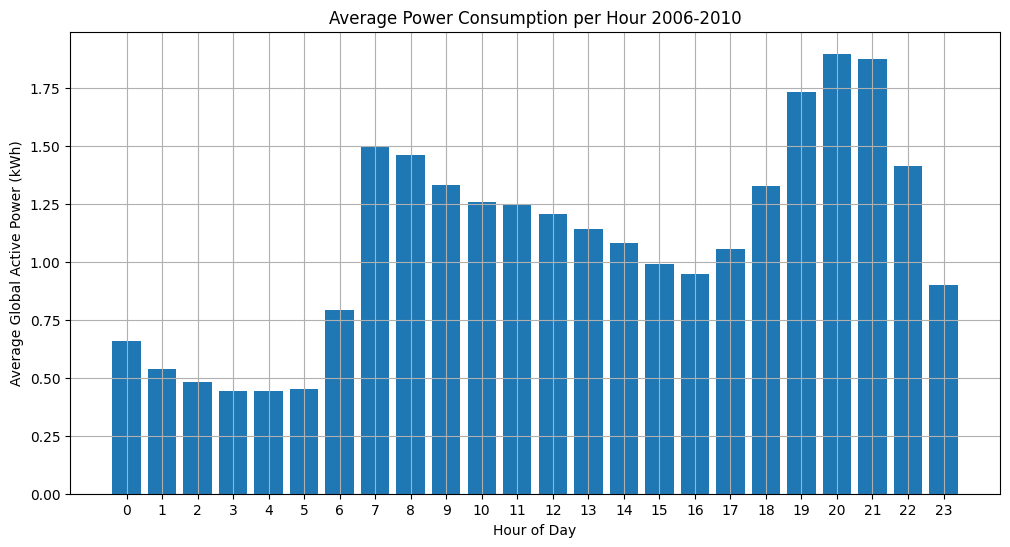

In [33]:
plot_hourly_histogram(calculate_avg_power_consumption_per_hour(household_power_consumption_df))

## Discussion about the data amalysis


We can see from the three resolution power consumption graphs few interesting things.
1. We can see that in the daily power consumption graph is very noisy, which indicates that the power consumption can vary by a noticable amount between the days.
2. We can see that the power consumption acting in a periodic way, peaking in January, and have minimum in July. This is probably because in January it is very cold and people turn on the AC or other devices to heat the house, and in July, the weather is pretty comfortable. 

In regard to the graph of inter day power consumption, we can see that there are 2 peaks, one of them around 7:00 in the morning, and the next one is at about 20:00 in the evening, when everybody gets home.

#### Handling missing values and outliers

The missing values (Nan values) will be replaced with the median of each feature.
The outliers will be filtered with the help of Z - score, that will filter any value of the feature that devaite more than 3 sigma form the mean. 

In [34]:

# Select only numerical columns
numeric_cols = household_power_consumption_df.select_dtypes(include=[np.number]).columns

# Fill NaN values with median of each column
household_power_consumption_df[numeric_cols] = household_power_consumption_df[numeric_cols].fillna(household_power_consumption_df[numeric_cols].median())

# Calculate Z-scores for the numerical columns
z_scores = np.abs((household_power_consumption_df[numeric_cols] - household_power_consumption_df[numeric_cols].mean()) / household_power_consumption_df[numeric_cols].std())

# Set a threshold (commonly 3 standard deviations)
threshold = 3

# Filter out the outliers
filtered_df = household_power_consumption_df[(z_scores < threshold).all(axis=1)]

# Print the shape of the original and filtered dataframes to see the number of rows removed
print(f"Original dataframe shape: {household_power_consumption_df.shape}")
print(f"Filtered dataframe shape: {filtered_df.shape}")

print("\nMissing values in each column:")
print(household_power_consumption_df.isnull().sum())


Original dataframe shape: (2075259, 9)
Filtered dataframe shape: (1938150, 9)

Missing values in each column:
Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64


### 3. Linear regression prediction using lag variables

In [35]:
# import  linear_regression_hw2 as lr


model_lag5, y_pred_lag5, y_test_lag5 = lr.train_and_evaluate_lagged_model(household_power_consumption_df, 'Global_active_power', 5)
model_lag10, y_pred_lag10, y_test_lag10 = lr.train_and_evaluate_lagged_model(household_power_consumption_df, 'Global_active_power', 10)
model_lag30, y_pred_lag30, y_test_lag30 = lr.train_and_evaluate_lagged_model(household_power_consumption_df, 'Global_active_power', 30)


### 4. Evaluating the linear regression model

In [36]:
mae_lag5, mse_lag5, rmse_lag5, r2_lag5 = lr.evaluate_performance(y_test_lag5, y_pred_lag5)
mae_lag10, mse_lag10, rmse_lag10, r2_lag10 = lr.evaluate_performance(y_test_lag10, y_pred_lag10)
mae_lag30, mse_lag30, rmse_lag30, r2_lag30 = lr.evaluate_performance(y_test_lag30, y_pred_lag30)


# Print performance metrics
print(f"Lags: 5 - MAE: {mae_lag5:.3f}, MSE: {mse_lag5:.3f}, RMSE: {rmse_lag5:.3f}, R²: {r2_lag5:.3f}")
print(f"Lags: 10 - MAE: {mae_lag10:.3f}, MSE: {mse_lag10:.3f}, RMSE: {rmse_lag10:.3f}, R²: {r2_lag10:.3f}")
print(f"Lags: 30 - MAE: {mae_lag30:.3f}, MSE: {mse_lag30:.3f}, RMSE: {rmse_lag30:.3f}, R²: {r2_lag30:.3f}")


Lags: 5 - MAE: 0.096, MSE: 0.069, RMSE: 0.263, R²: 0.938
Lags: 10 - MAE: 0.097, MSE: 0.068, RMSE: 0.261, R²: 0.938
Lags: 30 - MAE: 0.097, MSE: 0.067, RMSE: 0.259, R²: 0.939


We can see that increasing the number of lags does not improve the accuracy by much. Hence I will take 30 lags that correspond to 30 minutes.


In [37]:
# 3 next time periods prediction

lags = 30
target_col = 'Global_active_power'
household_power_consumption_df_lagged30 = household_power_consumption_df.copy()
    
 # Create lag features
household_power_consumption_df_lagged30 = lr.create_lag_features(household_power_consumption_df, target_col, lags)
# Get the most recent data point for prediction
recent_data = household_power_consumption_df_lagged30.iloc[-lags:][target_col].values.reshape(1, -1)

# To predict the next 3 minutes sequentially
predictions = []
for _ in range(3):
    next_value = model_lag30.predict(recent_data)
    predictions.append(next_value[0])
    
    # Update the recent data with the new prediction, shifting the window
    recent_data = np.roll(recent_data, -1)
    recent_data[0, -1] = next_value[0]

prediction_round = [round(num, 3) for num in predictions]
print(f"Predicted Global Active Power for the next 3 minutes: {prediction_round}")




Predicted Global Active Power for the next 3 minutes: [0.982, 0.974, 0.965]


C:\Users\97254\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\97254\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\97254\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


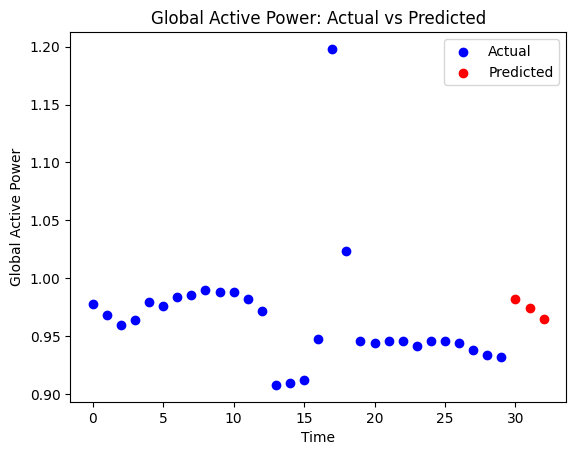

In [38]:


plot_predicted_values(household_power_consumption_df_lagged30.iloc[-lags:][target_col].values, predictions)

### 5.  Recurrent Neural Network (RNN) for power consumption prediction

In [39]:
# import rnn_lstm_hw2 as rn
# Usage example with 30 lags
target_col = 'Global_active_power'
lags = 30



In [79]:


 # Prepare data
X_train_rnn, X_test_rnn, y_train_rnn, y_test_rnn, scaler_rnn = rn.prepare_rnn_data(household_power_consumption_df, target_col, lags)

if (TO_TRAIN_OR_NOT_TO_TRAIN):
    # Train RNN
    model_rnn = rn.build_and_train_rnn(X_train_rnn, y_train_rnn, lags, num_units = 50, epochs = NUM_EPCOHS, batch_size = BATCH_SIZE)


   

In [41]:
if(TO_SAVE_OR_NOT_TO_SAVE):
    # Save the model in TensorFlow SavedModel format
    model_rnn.save('model_rnn.keras')

# Load the model from TensorFlow SavedModel format
loaded_model_rnn = load_model('model_rnn.keras')

In [80]:
 # Evaluate model
mae_rnn, mse_rnn, rmse_rnn, r2_rnn = rn.evaluate_model(loaded_model_rnn, X_test_rnn, y_test_rnn, scaler_rnn, target_col)


12971/12971 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step
Mean Absolute Error (MAE): 0.295
Mean Squared Error (MSE): 0.484
Root Mean Squared Error (RMSE): 0.696
R-squared (R²) value: 0.945


In [42]:

# Get the most recent data for prediction (last 'lags' data points)
recent_data = X_train_rnn[-1].reshape(1, lags, X_train_rnn.shape[2])

# Predict the next 3 values
predicted_values = rn.predict_next_values_rnn(loaded_model_rnn, recent_data, scaler_rnn, lags, num_predictions=3)

print("Predicted next 3 values:", np.round(predicted_values, 3))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Predicted next 3 values: [1.118 5.719 5.684]


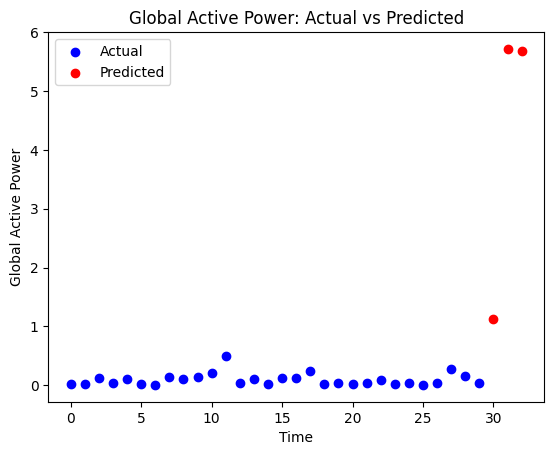

In [43]:


# Copy the last 30 values
y_train_rnn_last_30_values = y_train_rnn[-30:]
plot_predicted_values(y_train_rnn_last_30_values, predicted_values)


##### Comparison between RNN and linear regression for time series analysis
Let us compare first the metrices:

Linear regression:
MAE: 0.097, MSE: 0.067, RMSE: 0.259, R²: 0.939

RNN:
MAE: 0.295, MSE: 0.484, RMSE: 0.696, R² : 0.945

Comparing the metrices of the two models, it is possible to see that the RNN model got better results. Its errors values are lower than the linear regression and it describes the relation of the features and the target better according to the $R^2$.

However, we can see from the predicted values, that the linear regression predictions were much more reasonable, comparing to the RNN, where the RNN introduced a big bias and variance to the predicted values than the actual seen values in the original data. 



### 6. Long Short-Term Memory (LSTM)

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


# Prepare data. ** The preparation process of the data for lstm is the as the rnn. 
X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm, scaler_lstm = rn.prepare_rnn_data(household_power_consumption_df, target_col, lags)

if (TO_TRAIN_OR_NOT_TO_TRAIN):
    # Build the LSTM model
    model_lstm = Sequential([
        LSTM(3, activation='relu', input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
        Dense(1)
    ])

    model_lstm.compile(optimizer='adam', loss='mse')

    # Summary of the model
    model_lstm.summary()

    # Train the model
    history = model_lstm.fit(X_train_lstm, y_train_lstm, epochs = NUM_EPCOHS, batch_size=BATCH_SIZE, validation_split=0.2, verbose=1)



In [45]:
if(TO_SAVE_OR_NOT_TO_SAVE):
    # Save the model in TensorFlow SavedModel format
    model_lstm.save('model_lstm.keras')

# Load the model from TensorFlow SavedModel format
loaded_model_lstm = load_model('model_lstm.keras')

In [46]:
mae_lstm, mse_lstm, rmse_lstm, r2_lstm = rn.evaluate_model(loaded_model_lstm, X_test_lstm, y_test_lstm, scaler_lstm, target_col)


12971/12971 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step
Mean Absolute Error (MAE): 0.260
Mean Squared Error (MSE): 0.489
Root Mean Squared Error (RMSE): 0.699
R-squared (R²) value: 0.944


In [47]:
# Get the most recent data for prediction (last 'lags' data points)
recent_data_lstm = X_train_lstm[-1].reshape(1, lags, X_train_lstm.shape[2])

# Predict the next 3 values.  ** The rnn function is the same for the lstm
predicted_values_lstm = rn.predict_next_values_rnn(loaded_model_lstm, recent_data_lstm, scaler_lstm, lags, num_predictions=3)

print("Predicted next 3 values:", np.round(predicted_values_lstm, 3))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted next 3 values: [1.148 5.277 4.742]


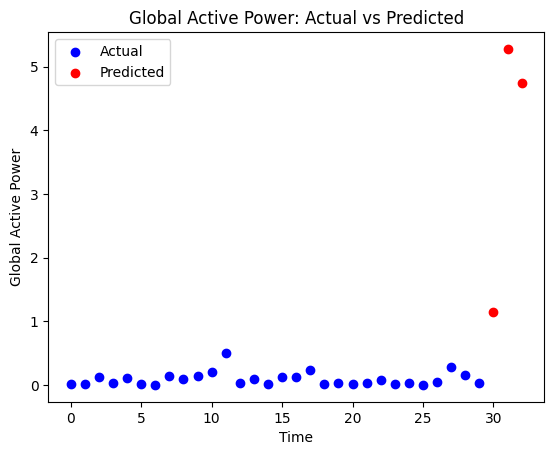

In [48]:
# Copy the last 30 values
y_train_lstm_last_30_values = y_train_lstm[-30:]
plot_predicted_values(y_train_lstm_last_30_values, predicted_values_lstm)

##### Comparison between LSTM RNN and linear regression for time series analysis
Let us compare first the metrices:

Linear regression:
MAE: 0.097, MSE: 0.067, RMSE: 0.259, R²: 0.939

RNN:
MAE: 0.295, MSE: 0.484, RMSE: 0.696, R² : 0.945

LSTM:
MAE: 0.260 , MSE: 0.489, RMSE: 0.699, R² : 0.944

Comparing the metrices of the three models, it is possible to see that the RNN model got better results than the other models. Its errors values are lower than the linear regression and the LSTM and it describes the relation of the features and the target better according to the $R^2$.

While it seems unexpected that the RNN performs better than the LSTM, it may be because using only 30 lags is not enough for the time series, and if the number of lags was larger, maybe the LSTM model would have performed better. 

Nevertheless, the LSTM and RNN predicted values that does not seem to fit the continuation of the time series, while the linear regression more resonable results.

### 8. Data augmentation

In [49]:
# import data_change_utils as data
# Normalize the numeric data for augmentation
numeric_df = household_power_consumption_df.select_dtypes(include=[np.number])

# Perform augmentation on 'Global_active_power'
augmented_df = data.augment_dataset(
    numeric_df,
    target_col='Global_active_power',
    augmentation_functions=[data.add_noise, data.scale_data, data.jitter_data],
    fraction=0.1
)



#### 8.1 RNN data augmentation

In [50]:
 # Prepare data
X_train_rnn_aug, X_test_rnn_aug, y_train_rnn_aug, y_test_rnn_aug, scaler_rnn_aug = rn.prepare_rnn_data(augmented_df, target_col, lags)

if (TO_TRAIN_OR_NOT_TO_TRAIN):
   
    # Train RNN
    model_rnn_aug = rn.build_and_train_rnn(X_train_rnn_aug, y_train_rnn_aug, lags, num_units = 50, epochs = NUM_EPCOHS, batch_size = BATCH_SIZE)

   

In [51]:
if(TO_SAVE_OR_NOT_TO_SAVE):
    #Save the model in TensorFlow SavedModel format
    model_rnn_aug.save('model_rnn_aug.keras')

# Load the model from TensorFlow SavedModel format
loaded_model_rnn_aug = load_model('model_rnn_aug.keras')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted next 3 values: [1.19  5.067 6.252]


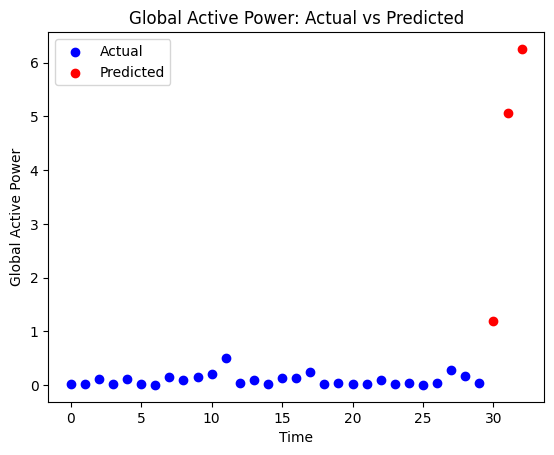

In [52]:
# Get the most recent data for prediction (last 'lags' data points)
recent_data_rnn_aug = X_train_rnn_aug[-1].reshape(1, lags, X_train_rnn_aug.shape[2])

# Predict the next 3 values.  ** The rnn function is the same for the lstm
predicted_values_rnn_aug = rn.predict_next_values_rnn(loaded_model_rnn_aug, recent_data_rnn_aug, scaler_rnn_aug, lags, num_predictions=3)

print("Predicted next 3 values:", np.round(predicted_values_rnn_aug, 3))

# Copy the last 30 values
y_train_rnn_aug_last_30_values = y_train_rnn_aug[-30:]
plot_predicted_values(y_train_rnn_aug_last_30_values, predicted_values_rnn_aug)

In [53]:
# Evaluate model
mae_rnn_aug, mse_rnn_aug, rmse_rnn_aug, r2_rnn_aug = rn.evaluate_model(loaded_model_rnn_aug, X_test_rnn_aug, y_test_rnn_aug, scaler_rnn_aug, target_col)


12971/12971 ━━━━━━━━━━━━━━━━━━━━ 19s 1ms/step
Mean Absolute Error (MAE): 0.270
Mean Squared Error (MSE): 0.474
Root Mean Squared Error (RMSE): 0.688
R-squared (R²) value: 0.946


#### 8.2 LSTM data augmentation

In [54]:
# Prepare data. ** The preparation process of the data for lstm is the as the rnn. 
X_train_lstm_aug, X_test_lstm_aug, y_train_lstm_aug, y_test_lstm_aug, scaler_lstm_aug = rn.prepare_rnn_data(augmented_df, target_col, lags)



if (TO_TRAIN_OR_NOT_TO_TRAIN):
    
    # Build the LSTM model
    model_lstm_aug = Sequential([
        LSTM(3, activation='relu', input_shape=(X_train_lstm_aug.shape[1], X_train_lstm_aug.shape[2])),
        Dense(1)
    ])

    model_lstm_aug.compile(optimizer='adam', loss='mse')

    # Summary of the model
    model_lstm_aug.summary()

    # Train the model
    history_aug = model_lstm_aug.fit(X_train_lstm_aug, y_train_lstm_aug, epochs = NUM_EPCOHS, batch_size = BATCH_SIZE, validation_split=0.2, verbose=1)



In [55]:
if(TO_SAVE_OR_NOT_TO_SAVE):
    # Save the model in TensorFlow SavedModel format
    model_lstm_aug.save('model_lstm_aug.keras')

# Load the model from TensorFlow SavedModel format
loaded_model_lstm_aug = load_model('model_lstm_aug.keras')

In [56]:
mae_lstm_aug, mse_lstm_aug, rmse_lstm_aug, r2_lstm_aug = rn.evaluate_model(loaded_model_lstm_aug, X_test_lstm_aug, y_test_lstm_aug, scaler_lstm_aug, target_col)


12971/12971 ━━━━━━━━━━━━━━━━━━━━ 24s 2ms/step
Mean Absolute Error (MAE): 0.270
Mean Squared Error (MSE): 0.483
Root Mean Squared Error (RMSE): 0.695
R-squared (R²) value: 0.944


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted next 3 values: [1.235 4.163 5.007]


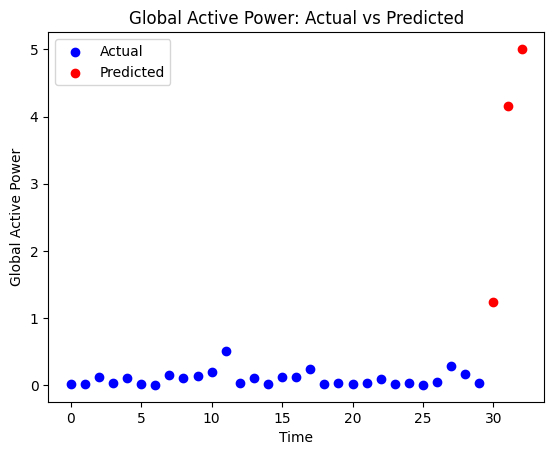

In [57]:
# Get the most recent data for prediction (last 'lags' data points)
recent_data_lstm_aug = X_train_lstm_aug[-1].reshape(1, lags, X_train_lstm_aug.shape[2])

# Predict the next 3 values.  ** The rnn function is the same for the lstm
predicted_values_lstm_aug = rn.predict_next_values_rnn(loaded_model_lstm_aug, recent_data_lstm_aug, scaler_lstm_aug, lags, num_predictions=3)

print("Predicted next 3 values:", np.round(predicted_values_lstm_aug, 3))

# Copy the last 30 values
y_train_lstm_aug_last_30_values = y_train_lstm_aug[-30:]
plot_predicted_values(y_train_lstm_aug_last_30_values, predicted_values_lstm_aug)

##### Impact of data augmention on RNN and LSTM

By performing data augmentation, we expect to get some improvement of the models, also by preventing overfitting to the data by introducing some additional artificial data.

Let us compare  the metrices:

RNN:
MAE: 0.295, MSE: 0.484, RMSE: 0.696, R² : 0.945

LSTM:
MAE: 0.260 , MSE: 0.489, RMSE: 0.699, R² : 0.944

RNN + data augmentation:
MAE: 0.270, MSE: 0.474, RMSE: 0.688, R²: 0.946

LSTM + data augmentation:
MAE: 0.270, MSE: 0.483, RMSE: 0.695, R² : 0.944


We can see by comparing all of the metrices that using data augmentation, we could improve the models accuracy. While there is improvement, it is not significant.

On the other hand, wee see that the predictions accuracy is not great at all. The data augmentation introduced additional Bias and Variance errors to the model, resulting in predicted data that is far from the range that was before the predicted points. I will assume in this case, that data augmentation is not a good method to perform in the case that the model has a Bias and Variance problem in the in the first place. 

### 9. Data reduction experiment

In [58]:
numeric_df = household_power_consumption_df.select_dtypes(include=[np.number])

# Perform data reduction
reduced_df = data.reduce_data(numeric_df, fraction=0.1)

# Check reduced data
reduced_df.shape

(1867734, 7)

#### 9.1. RNN data reduction

In [59]:
# Prepare data
X_train_rnn_red, X_test_rnn_red, y_train_rnn_red, y_test_rnn_red, scaler_rnn_red = rn.prepare_rnn_data(reduced_df, target_col, lags)


if (TO_TRAIN_OR_NOT_TO_TRAIN):
    
    # Train RNN
    model_rnn_red = rn.build_and_train_rnn(X_train_rnn_red, y_train_rnn_red, lags, num_units = 50, epochs = NUM_EPCOHS, batch_size = BATCH_SIZE)




In [60]:
if(TO_SAVE_OR_NOT_TO_SAVE):
    # Save the model in TensorFlow SavedModel format
    model_rnn_red.save('model_rnn_red.keras')

# Load the model from TensorFlow SavedModel format
loaded_model_rnn_red = load_model('model_rnn_red.keras')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Predicted next 3 values: [ 9.755 12.118 14.539]


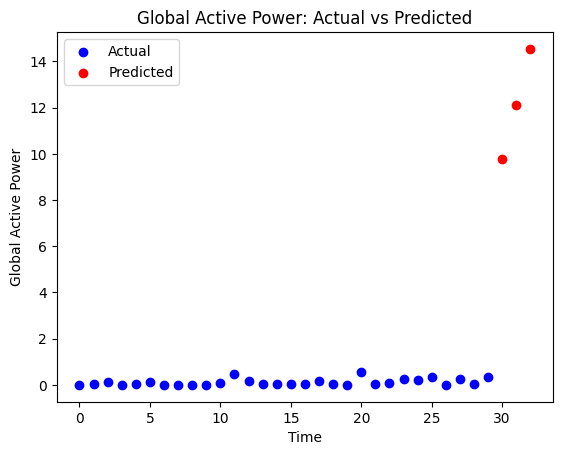

In [61]:
# Get the most recent data for prediction (last 'lags' data points)
recent_data_rnn_red = X_train_rnn_red[-1].reshape(1, lags, X_train_rnn_red.shape[2])

# Predict the next 3 values.  ** The rnn function is the same for the lstm
predicted_values_rnn_red = rn.predict_next_values_rnn(loaded_model_rnn_red, recent_data_rnn_red, scaler_rnn_red, lags, num_predictions=3)

print("Predicted next 3 values:", np.round(predicted_values_rnn_red, 3))

# Copy the last 30 values
y_train_rnn_red_last_30_values = y_train_rnn_red[-30:]
plot_predicted_values(y_train_rnn_red_last_30_values, predicted_values_rnn_red)

In [62]:
# Evaluate model
mae_rnn_red, mse_rnn_red, rmse_rnn_red, r2_rnn_red = rn.evaluate_model(loaded_model_rnn_red, X_test_rnn_red, y_test_rnn_red, scaler_rnn_red, target_col)



11674/11674 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step
Mean Absolute Error (MAE): 0.285
Mean Squared Error (MSE): 0.539
Root Mean Squared Error (RMSE): 0.734
R-squared (R²) value: 0.938


#### 9.2 LSTM data reduction

In [63]:
 # Prepare data. ** The preparation process of the data for lstm is the as the rnn. 
X_train_lstm_red, X_test_lstm_red, y_train_lstm_red, y_test_lstm_red, scaler_lstm_red = rn.prepare_rnn_data(reduced_df, target_col, lags)



if (TO_TRAIN_OR_NOT_TO_TRAIN):
   

    # Build the LSTM model
    model_lstm_red = Sequential([
        LSTM(3, activation='relu', input_shape=(X_train_lstm_red.shape[1], X_train_lstm_red.shape[2])),
        Dense(1)
    ])

    model_lstm_red.compile(optimizer='adam', loss='mse')

    # Summary of the model
    model_lstm_red.summary()

    # Train the model
    history_red = model_lstm_red.fit(X_train_lstm_red, y_train_lstm_red, epochs = NUM_EPCOHS, batch_size = BATCH_SIZE, validation_split=0.2, verbose=1)



In [64]:
if(TO_SAVE_OR_NOT_TO_SAVE):
    # Save the model in TensorFlow SavedModel format
    model_lstm_red.save('model_lstm_red.keras')

# Load the model from TensorFlow SavedModel format
loaded_model_lstm_red= load_model('model_lstm_red.keras')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 368ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Predicted next 3 values: [ 9.735  9.997 11.989]


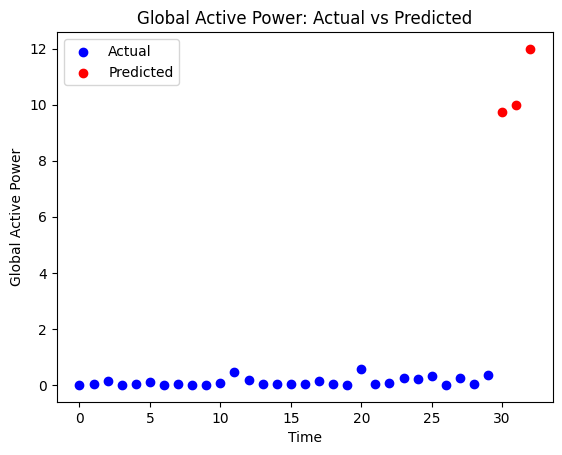

In [65]:
# Get the most recent data for prediction (last 'lags' data points)
recent_data_lstm_red = X_train_lstm_red[-1].reshape(1, lags, X_train_lstm_red.shape[2])

# Predict the next 3 values.  ** The rnn function is the same for the lstm
predicted_values_lstm_red = rn.predict_next_values_rnn(loaded_model_lstm_red, recent_data_lstm_red, scaler_lstm_red, lags, num_predictions=3)

print("Predicted next 3 values:", np.round(predicted_values_lstm_red, 3))

# Copy the last 30 values
y_train_lstm_red_last_30_values = y_train_lstm_red[-30:]
plot_predicted_values(y_train_lstm_red_last_30_values, predicted_values_lstm_red)

In [66]:
mae_lstm_red, mse_lstm_red, rmse_lstm_red, r2_lstm_red = rn.evaluate_model(loaded_model_lstm_red, X_test_lstm_red, y_test_lstm_red, scaler_lstm_red, target_col)


11674/11674 ━━━━━━━━━━━━━━━━━━━━ 23s 2ms/step
Mean Absolute Error (MAE): 0.279
Mean Squared Error (MSE): 0.550
Root Mean Squared Error (RMSE): 0.742
R-squared (R²) value: 0.937


##### Impact of data reduction on RNN and LSTM

By performing data reduction, we expect to get some deterioration of the accuracy of the models, because by reducing data, the model will have less knowledge to adjust and learn the behaviour of the data.

Let us compare  the metrices:

RNN:
MAE: 0.295, MSE: 0.484, RMSE: 0.696, R² : 0.945

LSTM:
MAE: 0.260 , MSE: 0.489, RMSE: 0.699, R² : 0.944

RNN + data reduction:
MAE: 0.286, MSE: 0.539, RMSE: 0.734, R² : 0.938

LSTM + data reduction:
MAE: 0.279, MSE: 0.548, RMSE: 0.740, R² : 0.937


We can see by comparing all of the metrices that using data reduction, the accuracy of the models deteriorates as expected.

On the other hand, it is interesting to see that the data reduction helped with the problem of the high Variance! While the bias of our models is pretty high, which leads to predicted points that are far from the original data points, the predicted points are closer together in both models, which show that the data reduction acctually helped with to reduce some of the noise in the data. 

### 10. Data resolution experiment

In [67]:

household_power_consumption_df_copy = household_power_consumption_df.copy()


# Reducing the resolution by factor of 2:

def reduce_resolution(df, date_column, time_column, interval='2T'):
    # Combine Date and Time into a single datetime column if needed
    if not pd.api.types.is_datetime64_any_dtype(df[date_column]):
        df['Datetime'] = pd.to_datetime(df[date_column] + ' ' + df[time_column], format='%d/%m/%Y %H:%M:%S')

    # Set the combined datetime column as the DataFrame index
    df.set_index('Datetime', inplace=True)

    # Resample the DataFrame to the specified interval and calculate the mean for each interval
    df_resampled = df.resample(interval).mean()

    # Reset the index to turn the datetime index back into a column
    df_resampled.reset_index(inplace=True)

    return df_resampled


# Assuming `household_power_consumption_df` is your DataFrame and it has 'Date' and 'Time' columns
reduced_res_df = reduce_resolution(household_power_consumption_df_copy, date_column='Date', time_column='Time')






C:\Users\97254\AppData\Local\Temp\ipykernel_30408\1658645115.py:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_resampled = df.resample(interval).mean()


In [68]:
print("Original shape: ", household_power_consumption_df_copy.shape)
print("Shape after resolution reduction: ", reduced_res_df.shape)

Original shape:  (2075259, 9)
Shape after resolution reduction:  (1037630, 8)


#### 10.1. RNN resolution reduction 

In [69]:

# Prepare data for RNN
X_train_res, X_test_res, y_train_res, y_test_res, scaler_res = rn.prepare_rnn_data(reduced_res_df, target_col, lags)

if (TO_TRAIN_OR_NOT_TO_TRAIN):
    # Train the RNN model on data with reduced time resolution
    model_rnn_res = rn.build_and_train_rnn(X_train_res, y_train_res, lags, num_units=50, epochs = NUM_EPCOHS, batch_size = BATCH_SIZE)



In [70]:
if(TO_SAVE_OR_NOT_TO_SAVE):
    # Save the model in TensorFlow SavedModel format
    model_rnn_res.save('model_rnn_res.keras')

# Load the model from TensorFlow SavedModel format
loaded_model_rnn_res= load_model('model_rnn_res.keras')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted next 3 values: [0.541 0.833 0.941]


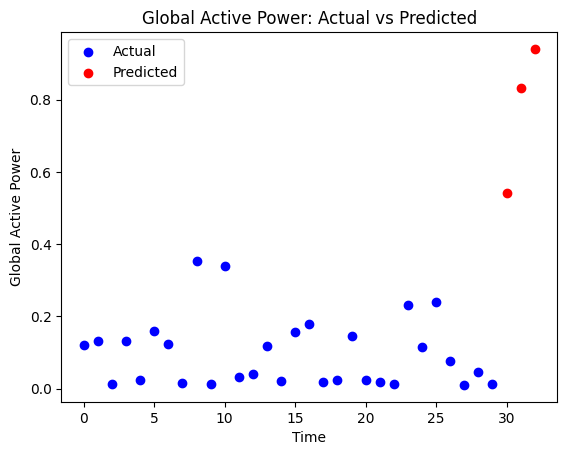

In [71]:
# Get the most recent data for prediction (last 'lags' data points)
recent_data_rnn_res = X_train_res[-1].reshape(1, lags, X_train_res.shape[2])

# Predict the next 3 values.  ** The rnn function is the same for the lstm
predicted_values_rnn_res = rn.predict_next_values_rnn(loaded_model_rnn_res, recent_data_rnn_res, scaler_res, lags, num_predictions=3)

print("Predicted next 3 values:", np.round(predicted_values_rnn_res, 3))

# Copy the last 30 values
y_train_rnn_res_last_30_values = y_train_res[-30:]
plot_predicted_values(y_train_rnn_res_last_30_values, predicted_values_rnn_res)

In [72]:
# Evaluate the model trained on reduced resolution data
mae_rnn_res, mse_rnn_res, rmse_rnn_res, r2_rnn_res = rn.evaluate_model(loaded_model_rnn_res, X_test_res, y_test_res, scaler_res, target_col)



6485/6485 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step
Mean Absolute Error (MAE): 0.411
Mean Squared Error (MSE): 0.755
Root Mean Squared Error (RMSE): 0.869
R-squared (R²) value: 0.916


#### 10.2. LSTM resolution reduction

In [73]:
# Prepare data. ** The preparation process of the data for lstm is the as the rnn. 
X_train_lstm_res, X_test_lstm_res, y_train_lstm_res, y_test_lstm_res, scaler_lstm_res = rn.prepare_rnn_data(reduced_res_df, target_col, lags)

if (TO_TRAIN_OR_NOT_TO_TRAIN):
    # Build the LSTM model
    model_lstm_res = Sequential([
        LSTM(3, activation='relu', input_shape=(X_train_lstm_res.shape[1], X_train_lstm_res.shape[2])),
        Dense(1)
    ])

    model_lstm_res.compile(optimizer='adam', loss='mse')

    # Summary of the model
    model_lstm_res.summary()

    # Train the model
    history_res = model_lstm_res.fit(X_train_lstm_res, y_train_lstm_res, epochs = NUM_EPCOHS, batch_size = BATCH_SIZE, validation_split=0.2, verbose=1)


In [74]:
if(TO_SAVE_OR_NOT_TO_SAVE):
    # Save the model in TensorFlow SavedModel format
    model_lstm_res.save('model_lstm_res.keras')

# Load the model from TensorFlow SavedModel format
loaded_model_lstm_res= load_model('model_lstm_res.keras')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted next 3 values: [0.411 0.578 0.526]


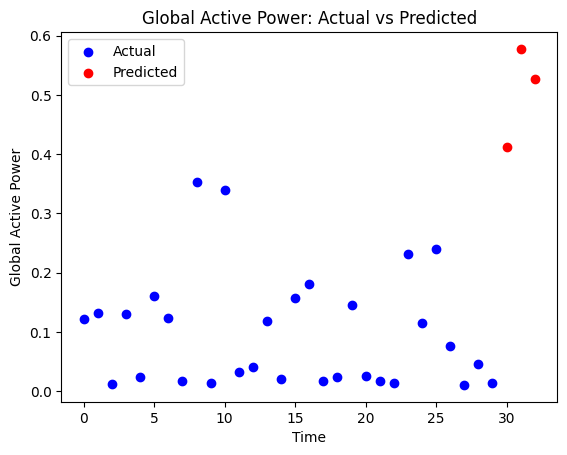

In [75]:
# Get the most recent data for prediction (last 'lags' data points)
recent_data_lstm_res = X_train_lstm_res[-1].reshape(1, lags, X_train_lstm_res.shape[2])

# Predict the next 3 values.  ** The rnn function is the same for the lstm
predicted_values_lstm_res = rn.predict_next_values_rnn(loaded_model_lstm_res, recent_data_lstm_res, scaler_lstm_res, lags, num_predictions=3)

print("Predicted next 3 values:", np.round(predicted_values_lstm_res, 3))

# Copy the last 30 values
y_train_lstm_res_last_30_values = y_train_lstm_res[-30:]
plot_predicted_values(y_train_lstm_res_last_30_values, predicted_values_lstm_res)

In [76]:
mae_lstm_res, mse_lstm_res, rmse_lstm_res, r2_lstm_res = rn.evaluate_model(loaded_model_lstm_res, X_test_lstm_res, y_test_lstm_res, scaler_lstm_res, target_col)


6485/6485 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step
Mean Absolute Error (MAE): 0.401
Mean Squared Error (MSE): 0.774
Root Mean Squared Error (RMSE): 0.880
R-squared (R²) value: 0.914


##### Impact of data reduction on RNN and LSTM

By performing data resolution reduction, again we expect to get some deterioration of the accuracy of the models, and this time, because the resolution goes down by half, we expect a much more significant deterioration in the metrices. On the other hand, it might help with prediction, because by lowering the resolution, may reduce the noise of the data.

Let us compare  the metrices:

RNN:
MAE: 0.295, MSE: 0.484, RMSE: 0.696, R² : 0.945

LSTM:
MAE: 0.260 , MSE: 0.489, RMSE: 0.699, R² : 0.944

RNN + data reduced resolution:
MAE: 0.411, MSE: 0.755, RMSE: 0.869, R² : 0.916

LSTM + data reduced resolution:
MAE: 0.401, MSE: 0.774, RMSE: 0.880, R² : 0.914


We can see by comparing all of the metrices that using data resolution reduction, the accuracy of the models deteriorates by a significant amount, comparing to the data reduction experiment.

On the other hand, the predicted values are much closer to the original data points. Meaning, the resolution reduction helped reducing the noise of the data, which lead to reduction of both the Bias and Variance of the models! 

### 11. Conclusion and insights: 


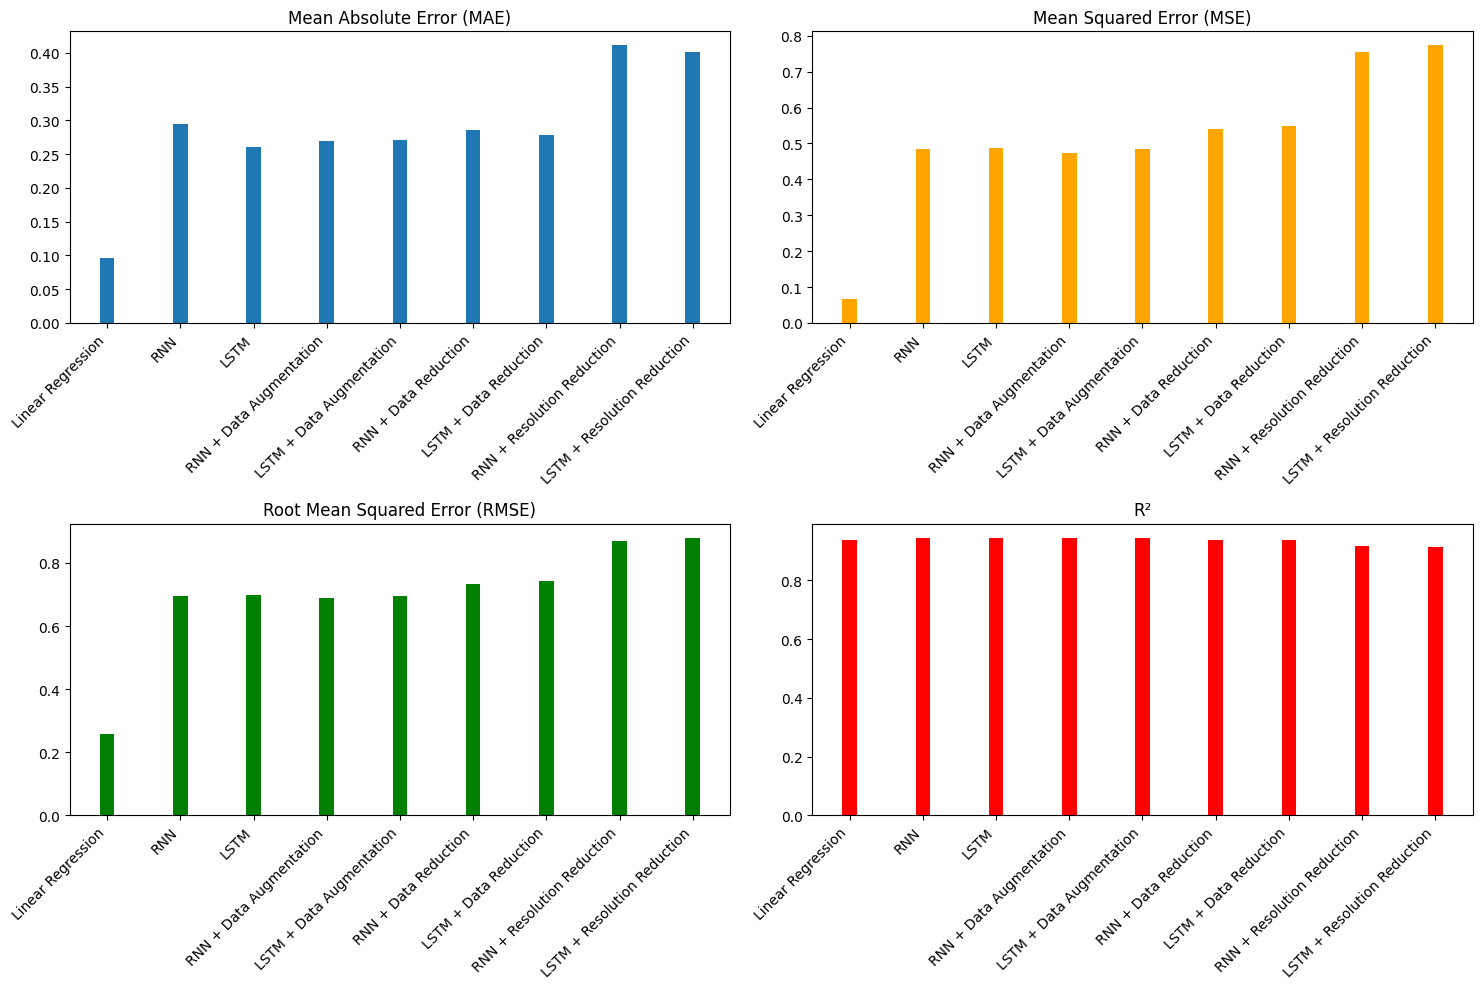

In [81]:
from lab2_hw2_utils import *

models = [
    'Linear Regression', 'RNN', 'LSTM', 
    'RNN + Data Augmentation', 'LSTM + Data Augmentation', 
    'RNN + Data Reduction', 'LSTM + Data Reduction', 
    'RNN + Resolution Reduction', 'LSTM + Resolution Reduction'
]

metrics = {
    'MAE':  [mae_lag30, mae_rnn, mae_lstm, mae_rnn_aug,mae_lstm_aug, mae_rnn_red, mae_lstm_red, mae_rnn_res, mae_lstm_res],
    'MSE':  [mse_lag30, mse_rnn, mse_lstm, mse_rnn_aug,mse_lstm_aug, mse_rnn_red, mse_lstm_red, mse_rnn_res,mse_lstm_res],
    'RMSE': [rmse_lag30, rmse_rnn, rmse_lstm, rmse_rnn_aug, rmse_lstm_aug, rmse_rnn_red, rmse_lstm_red, rmse_rnn_res, rmse_lstm_res],
    'R²':   [r2_lag30, r2_rnn, r2_lstm,r2_rnn_aug, r2_lstm_aug, r2_rnn_red, r2_lstm_red,r2_rnn_res, r2_lstm_res]
}


plot_all_metrices(models, metrics)

We can see in the above graphs all the metrics comparison between the models.
We can see from the graphs that the Linear Regression surprisingly out performed the fit to the data, and also predicted a reasonable data points. 
Additionally, we saw that the difference between LSTM and RNN is not significant in this dataset case. Both models performed more or less the same, with a minor advantage to RNN. 

Regarding the predicted data points for each model, we saw that the RNN and LSTM had a big Bias and Variance problem. We saw that the data augmentation made the problem worse, because of adding more data, and thus, more noise to the dataset that was noisy in the first place.  
By reducing the data, and thus, eliminating some of the noise, the experiment showed that it can reduce some of the variance problem, but the Bias got worse even more.
The experiment that gave the best results was the data resolution reduction. This method probably reduced the noise by a great factor, resulting in both models to reduce the Bias and variance problem, and thus, gave much more accurate predictions.

It is worth to note, that the metrics does not correlate to the predictions results. While the best predictions results were achieved in the resolution reduction experiment, the metrics of this experiment were the worst for both the models. Perhaps the number of lags we used was very high, or the number of predictions should be higher in order to evaluate the predictions versus the metrics in a more accurate way.  

For future work, it is worth to examine the effect of different lags, larger number of predictions, and different time resolution.